In [2]:
# Brenda Woodard
# Data Mining Week 5

from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# Example using TransactonEncoder, and the aprirori
# Read the comments which attempt to explain the code
# http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

pd.set_option('display.max_columns',20)
# pd.set_option('display.max_rows',30)
pd.set_option('display.max_rows',None)  # print all the rows
pd.set_option('display.width',None)   # allow long lines to get rid of ...

## Use this to read data from the csv file on local system.
# df = pd.read_csv('./retailDataset.csv', sep=',')

# data represented as  list of lists
theData = [
['milk','onion','egg','bread','chili'],
['milk','egg','bread','chili'],
['milk','garlic','beans','chili'],
['milk','egg','beans','chili'],
['milk','onion','egg','bread'],
['milk','onion','egg'],
['garlic','onion','beans'],
['garlic','onion','beans'],
['garlic','onion','beans'],
['garlic','onion','beans'],
['chili','garlic','onion','beans'],
['chili','garlic','onion','beans'],
['garlic','onion','milk'],
['garlic','onion'],
['garlic','chili'],
['garlic','chili'],
['milk','onion','egg'],
['milk','onion','egg'],
['milk','onion','egg','bread'],
['milk','onion','chili','bread'],
]

# use transaction encoder to transform into a 1-hot boolean encoded numpy arrayk
te = TransactionEncoder()
te_ary = te.fit(theData).transform(theData)
print("\n\nte_ary returned from TransactionEncoder.fit().transform():")
print(te_ary)

# convert into a data frame for convience & to pass into apriori
df2 = pd.DataFrame(te_ary,columns = te.columns_)

print("\n\nDataFrame version:")
print(df2.head(25))

# Call apriori to find frequent itemsets with min_support = 30%
freq_items = apriori(df2,min_support=0.3,use_colnames=True)
print("\n\nfreq_items:")
print(freq_items)

#for index, row in freq_items.iterrows():
#	print(str(row[0]) + ' ' + str(row[1]) )

# add a column to freq_items that contains the number of items in the itemset
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
print(type(freq_items))
print( freq_items.columns)
print(freq_items)

# examples of how to filter your itemsets further, for illustration only, not actually used below
# NOTE: Do not assign back to freq_items because may remove rows need by association_rules() function below
reducedFreqItems = freq_items[(  ((freq_items['length'] == 2) &  (freq_items['support'] >= 0.40)) |
	((freq_items['length'] >= 3) &  (freq_items['support'] >= 0.30)) )]
# reducedFreqItems = freq_items[ (freq_items['length'] >= 2) &  (freq_items['support'] >= 0.35) ]
print("\n\nReduced freq_items (length == 2 & support >= 40%) | (length >=3 & support >= 30%) ")
print(reducedFreqItems)

# now mine the rules by calling association_rules
print("\n\nThe rules:")
rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)
print(type(rules))

# rename columns "antecedents support" to "antsup" and "consequents support" to "consup" so print nicer table
rules.columns = [ 'antecedents', 'consequents', 'antsup', 'consup', 'support', 'confidence', 'lift', 'leverage', 'conviction']
print(rules.columns)
# print( rules[ ["antecedents","consequents","support","confidence","lift"] ] )
# print( rules[ ["antecedents","antsup","consequents","consup","support","confidence","lift"] ] )
print( rules[ ["antecedents","consequents","antsup","consup","support","confidence","lift"] ] )

# print("rules.head(20):")
# print( rules.head(20) )



te_ary returned from TransactionEncoder.fit().transform():
[[False  True  True  True False  True  True]
 [False  True  True  True False  True False]
 [ True False  True False  True  True False]
 [ True False  True  True False  True False]
 [False  True False  True False  True  True]
 [False False False  True False  True  True]
 [ True False False False  True False  True]
 [ True False False False  True False  True]
 [ True False False False  True False  True]
 [ True False False False  True False  True]
 [ True False  True False  True False  True]
 [ True False  True False  True False  True]
 [False False False False  True  True  True]
 [False False False False  True False  True]
 [False False  True False  True False False]
 [False False  True False  True False False]
 [False False False  True False  True  True]
 [False False False  True False  True  True]
 [False  True False  True False  True  True]
 [False  True  True False False  True  True]]


DataFrame version:
    beans  bread 

In [4]:
dat = []  
with open('exercise5b_input.csv.txt', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        dat.append(row)
dat

# use transaction encoder to transform into an 1-hot boolean encoded numpy arrayk
te = TransactionEncoder()
te_ary = te.fit(dat).transform(dat)
print("\n\nte_ary returned from TransactionEncoder.fit().transform():")
print(te_ary)

# convert into a data fram for convience and to pass into apriori
df2 = pd.DataFrame(te_ary,columns = te.columns_)

print("\n\nDataFrame version:")
print(df2.head(25))


# Call apriori to find frequent itemsets with min_support = 30%
freq_items = apriori(df2,min_support=0.05,use_colnames=True)
print("\n\nfreq_items:")
print(freq_items)

#for index, row in freq_items.iterrows():
#	print(str(row[0]) + ' ' + str(row[1]) )

# # add a column to freq_items that contains the number of items in the itemset
# freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
# print(type(freq_items))
# print( freq_items.columns)
# print(freq_items)

# # examples of how to filter your itemsets further, for illustration only, not actually used below
# # NOTE: Do not assign back to freq_items because may remove rows need by association_rules() function below
# reducedFreqItems = freq_items[(  ((freq_items['length'] == 2) &  (freq_items['support'] >= 0.40)) |
# 	((freq_items['length'] >= 3) &  (freq_items['support'] >= 0.30)) )]
# # reducedFreqItems = freq_items[ (freq_items['length'] >= 2) &  (freq_items['support'] >= 0.35) ]
# print("\n\nReduced freq_items (length == 2 & support >= 40%) | (length >=3 & support >= 30%) ")
# print(reducedFreqItems)

# now mine the rules by calling association_rules
print("\n\nThe rules:")
rules = association_rules(freq_items, metric="confidence", min_threshold=0.3)
print(type(rules))

# rename columns "antecedents support" to "antsup" and "consequents support" to "consup" so print nicer table
rules.columns = [ 'antecedents', 'consequents', 'antsup', 'consup', 'support', 'confidence', 'lift', 'leverage', 'conviction']
print(rules.columns)
# print( rules[ ["antecedents","consequents","support","confidence","lift"] ] )
# print( rules[ ["antecedents","antsup","consequents","consup","support","confidence","lift"] ] )
print( rules[ ["antecedents","consequents","antsup","consup","support","confidence","lift"] ] )

# print("rules.head(20):")
# print( rules.head(20) )



te_ary returned from TransactionEncoder.fit().transform():
[[False False False ... False False  True]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False  True False ... False False False]
 [False False False ... False False False]]


DataFrame version:
     jaggery  all purpose flour  almond  almonds   aloo  alum powder  \
0      False              False   False    False  False        False   
1      False              False   False    False  False        False   
2      False              False   False    False  False        False   
3      False              False   False     True  False        False   
4      False              False   False    False  False        False   
5      False              False   False    False  False        False   
6      False              False   False    False  False        False   
7      False              False   False    False  False        False   
8     

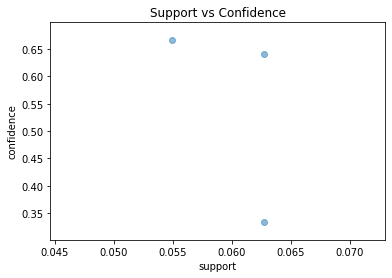

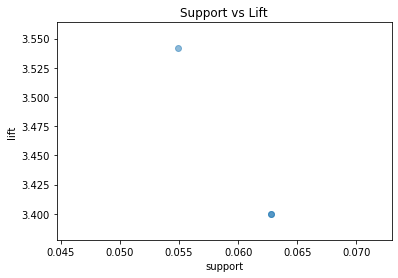

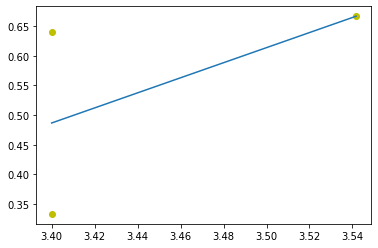

In [5]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()


fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))